## Brightness and LIME image explainer

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.io import imsave, imshow
from astroExplain.image.neighbors import Neighbors
from astroExplain.image.explanation import TellMeWhy
from sdss.utils.managefiles import FileDirectory

%matplotlib inline

In [ ]:
def segment(image, sigma, compactness, nsegments):
 
    slic_parameters = {'sigma': sigma, 'compactness': compactness}

    nghs = Neighbors(
        image=image,
        number_segments=nsegments,
        slic_parameters=slic_parameters,
        random_seed=0
    )

    image_with_boundaries = mark_boundaries(
        nghs.image, nghs.segments,
        color=(1, 1, 1),
        outline_color=(1, 1, 1),
    )

    plt.clf()
    # plt.imshow(image_with_boundaries)
    imshow(image_with_boundaries)
    plt.axis("off")
    plt.tight_layout()

    save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
    fname = f"segments_{nsegments}_sigma_{sigma}_compactness_{compactness}"
    # imsave(f"{save_to}/{fname}.pdf", image_with_boundaries)
    # imsave(f"{save_to}/{fname}.png", image_with_boundaries)
    # plt.savefig(f"{save_to}/{fname}.pdf")
    # plt.savefig(f"{save_to}/{fname}.png")

    return image_with_boundaries, nghs

In [ ]:
data = "/home/edgar/xai-astronomy/data/images"
# load data
image = plt.imread(f"{data}/weird.jpg")/255.

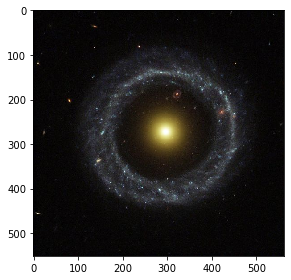

In [3]:
imshow(image)

## Different segmentations

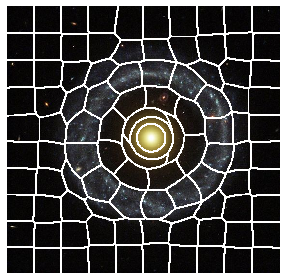

In [6]:
image_with_boundaries, nghs = segment(
    image, sigma=16, compactness=10, nsegments=100
)

In [18]:
perturbations = nghs.get_neighbors(100, None)

In [20]:
for idx, perturbation in enumerate(perturbations):
    
    # plt.clf()

    ngh_with_boundaries = mark_boundaries(
        perturbation, nghs.segments,
        color=(1, 1, 1),
        outline_color=(1, 1, 1),
    )

    # plt.axis('off')

    # imshow(ngh_with_boundaries)

    # plt.tight_layout()
    # plt.show()
    
    save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
    
    fname = f"neighbor_{idx}_segments_{100}_sigma_{16}_compactness_{10}"
    # plt.savefig(f"{save_to}/{fname}.pdf")
    # plt.savefig(f"{save_to}/{fname}.png")
    imsave(f"{save_to}/{fname}.png", ngh_with_boundaries)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

# Explanations

Get heat map of explanation


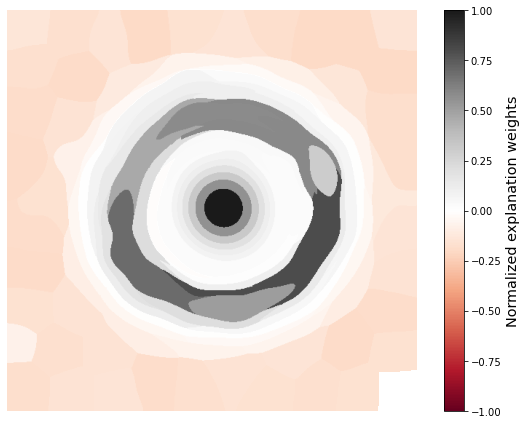

In [31]:
explanation_directory = "/home/edgar/xai-astronomy/data/images/weird/"
# explanation_file = "weird_hide_none_base_mean_100_compactness_10"
# explanation_file = "weird_hide_0.08_base_mean_100_compactness_100"
# explanation_file = "weird_hide_0.08_base_mean_100_compactness_10"
explanation_file = "weird_hide_0.08_base_mean_100_compactness_1"

with open(f"{explanation_directory}/{explanation_file}.pkl", "rb") as file:

    explainer = pickle.load(file)
    why = TellMeWhy(explainer)

weights_map = why.get_heatmap()
weights_map *= 1/np.nanmax(np.abs(weights_map))
plt.figure(figsize=(8, 6))
# fig, axs = plt.subplots(nrows=1, ncols=2 ,tight_layout=True)
# axs[0].imshow(image_with_boundaries)
# axs[1].imshow(weights_map, cmap="RdGy", vmin=-1, vmax=1)
# fig.colorbar(axs[1])
plt.clf()
plt.imshow(weights_map, cmap="RdGy", vmin=-1, vmax=1)
cbar = plt.colorbar(
    # label="Normalized explanation weights"
)
cbar.ax.set_ylabel(
    "Normalized explanation weights",
    # rotation=270,
    fontsize="x-large"
)
plt.axis('off')
plt.tight_layout()

save_to = "/home/edgar/explain-me-why/sections/figures/lime/hoag_object"
# plt.savefig(f"{save_to}/{explanation_file}.pdf")
plt.savefig(f"{save_to}/{explanation_file}.png")
# imsave(f"{save_to}/{explanation_file}.png", weights_map)


In [32]:
tata = plt.imread(f"{save_to}/{explanation_file}.png")